In [1]:
import sys
sys.path.append("~/Desktop/pypsa-za-master")

In [2]:
import pypsa
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("bmh")
%matplotlib inline

In [3]:
import pandas as pd
import geopandas as gpd
import numpy
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib.patches import Circle, Ellipse
from matplotlib.legend_handler import HandlerPatch
from vresutils import plot as vplot
from vresutils import Dict

In [12]:
#Pre_solved - show network for 2030
# 275 Mt CO2
#n = pypsa.Network("results/networks/solved_val-LC-UNC_27-supply_redz_lcopt_LC-73H.nc")

# 96 Mt CO2
n = pypsa.Network("results/networks/solved_val-2Gt-UNC_27-supply_redz_lcopt_LC-73H.nc")

INFO:pypsa.io:Imported network solved_val-2Gt-UNC_27-supply_redz_lcopt_LC-73H.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


In [5]:
print(n)

PyPSA Network 'PyPSA-ZA'
Components:
 - Bus: 27
 - Carrier: 12
 - Generator: 695
 - GlobalConstraint: 17
 - Line: 120
 - Load: 27
 - StorageUnit: 328
Snapshots: 120


In [6]:
n.generators.head(50)

,bus,carrier,build_year,lifetime,p_nom,p_nom_extendable,efficiency,ramp_limit_up,ramp_limit_down,marginal_cost,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Arnot*,HIGHVELD NORTH,coal,2020,7.0,1116.00,False,0.282486,0.112903,0.112903,428.080561,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Arnot**,HIGHVELD NORTH,coal,2020,10.0,1116.00,False,0.282486,0.112903,0.112903,428.079901,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Camden*,HIGHVELD SOUTH,coal,2020,2.0,740.00,False,0.265018,0.089189,0.089189,536.773941,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Camden**,HIGHVELD SOUTH,coal,2020,4.0,370.00,False,0.252101,0.178378,0.178378,559.254138,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Duvha*,HIGHVELD NORTH,coal,2020,12.0,1725.00,False,0.298359,0.114783,0.114783,315.197008,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Duvha**,HIGHVELD NORTH,coal,2020,15.0,1150.00,False,0.298359,0.172174,0.172174,315.197566,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Grootvlei*,NIGEL,coal,2020,-1.0,286.00,False,0.261059,0.188811,0.188811,508.951502,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Grootvlei**,NIGEL,coal,2020,0.0,286.00,False,0.261059,0.188811,0.188811,508.952154,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Hendrina*,HIGHVELD NORTH,coal,2020,1.0,440.00,False,0.271370,0.150000,0.150000,478.745064,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


In [36]:
n.generators.loc[n.generators.build_year == 2020].head(60)

,bus,carrier,build_year,lifetime,p_nom,p_nom_extendable,efficiency,ramp_limit_up,ramp_limit_down,marginal_cost,...,sign,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
Arnot*,HIGHVELD NORTH,coal,2020,3.0,1116.00,False,0.282486,0.112903,0.112903,428.080007,...,1.0,False,0.0,0.0,0,0,1,0,1.0,1.0
Arnot**,HIGHVELD NORTH,coal,2020,10.0,1116.00,False,0.282486,0.112903,0.112903,428.080485,...,1.0,False,0.0,0.0,0,0,1,0,1.0,1.0
Camden*,HIGHVELD SOUTH,coal,2020,1.0,740.00,False,0.265018,0.089189,0.089189,536.773221,...,1.0,False,0.0,0.0,0,0,1,0,1.0,1.0
Camden**,HIGHVELD SOUTH,coal,2020,4.0,370.00,False,0.252101,0.178378,0.178378,559.254747,...,1.0,False,0.0,0.0,0,0,1,0,1.0,1.0
Duvha*,HIGHVELD NORTH,coal,2020,11.0,1150.00,False,0.298359,0.172174,0.172174,315.198906,...,1.0,False,0.0,0.0,0,0,1,0,1.0,1.0
Duvha**,HIGHVELD NORTH,coal,2020,14.0,1725.00,False,0.298359,0.114783,0.114783,315.198631,...,1.0,False,0.0,0.0,0,0,1,0,1.0,1.0
Grootvlei*,NIGEL,coal,2020,-1.0,286.00,False,0.261059,0.188811,0.188811,508.952270,...,1.0,False,0.0,0.0,0,0,1,0,1.0,1.0
Grootvlei**,NIGEL,coal,2020,0.0,286.00,False,0.261059,0.188811,0.188811,508.951255,...,1.0,False,0.0,0.0,0,0,1,0,1.0,1.0
Hendrina*,HIGHVELD NORTH,coal,2020,1.0,440.00,False,0.271370,0.150000,0.150000,478.743613,...,1.0,False,0.0,0.0,0,0,1,0,1.0,1.0


In [10]:
n.generators.loc[n.generators.carrier == "OCGT"].head(80)

,bus,carrier,build_year,lifetime,p_nom,p_nom_extendable,efficiency,ramp_limit_up,ramp_limit_down,marginal_cost,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
JOHANNESBURG OCGT_2020,JOHANNESBURG,OCGT,2020,30.0,0.0,True,0.312527,NaN,NaN,1730.859234,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
WEST COAST OCGT_2020,WEST COAST,OCGT,2020,30.0,0.0,True,0.312527,NaN,NaN,1730.859621,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
EMPANGENI OCGT_2020,EMPANGENI,OCGT,2020,30.0,0.0,True,0.312527,NaN,NaN,1730.859097,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
PORT ELIZABETH OCGT_2020,PORT ELIZABETH,OCGT,2020,30.0,0.0,True,0.312527,NaN,NaN,1730.860507,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
JOHANNESBURG OCGT_2022,JOHANNESBURG,OCGT,2022,30.0,0.0,True,0.312527,NaN,NaN,1730.860405,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
WEST COAST OCGT_2022,WEST COAST,OCGT,2022,30.0,0.0,True,0.312527,NaN,NaN,1730.859020,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
EMPANGENI OCGT_2022,EMPANGENI,OCGT,2022,30.0,0.0,True,0.312527,NaN,NaN,1730.859513,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
PORT ELIZABETH OCGT_2022,PORT ELIZABETH,OCGT,2022,30.0,0.0,True,0.312527,NaN,NaN,1730.860512,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
JOHANNESBURG OCGT_2024,JOHANNESBURG,OCGT,2024,30.0,0.0,True,0.312527,NaN,NaN,1730.859081,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


In [11]:
n.carriers

,co2_emissions,color,nice_name,max_growth
Carrier,,,,
CSP,0.0000,#FEED82,Csp,inf
biomass,0.0000,#0c6013,Biomass,inf
PHS,0.0000,#004F95,Pumped Hydro Storage,inf
coal,0.3000,#3C3C3C,Coal,inf
gas,0.1794,#d35050,Gas,inf
hydro,0.0000,#004F95,Hydro,inf
hydro-import,0.0000,#004F95,Hydro-Import,inf
nuclear,0.0000,#C84936,Nuclear,inf
CCGT,0.1794,#CCC8C8,CCGT,inf


In [122]:
n.carriers.loc['onwind'] = [0, '#0072C6', 'Wind', "inf"]

In [12]:
n.buses

,x,y,v_nom,population,control,generator,type,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
NAMAQUALAND,18.908377,-28.955801,400.0,1.236927e+05,PQ,,,AC,None,1.0,0.0,inf,
WEST COAST,19.461249,-31.257597,400.0,3.042586e+05,PQ,,,AC,None,1.0,0.0,inf,
PENINSULA,18.880971,-33.770489,400.0,4.287938e+06,PQ,,,AC,None,1.0,0.0,inf,
SOUTHERN CAPE,21.111201,-32.980465,400.0,1.136102e+06,PQ,,,AC,None,1.0,0.0,inf,
PORT ELIZABETH,24.766811,-32.712855,400.0,1.700147e+06,PQ,,,AC,None,1.0,0.0,inf,
KAROO,24.052750,-30.409650,400.0,4.383966e+05,PQ,,,AC,None,1.0,0.0,inf,
KIMBERLEY,23.087957,-27.591979,400.0,1.203351e+06,PQ,,,AC,None,1.0,0.0,inf,
CARLETONVILLE,26.049052,-26.488231,400.0,1.850542e+06,PQ,,,AC,None,1.0,0.0,inf,
WELKOM,26.978115,-27.618006,400.0,8.279928e+05,PQ,,,AC,None,1.0,0.0,inf,


In [13]:
n.lines

,bus0,bus1,length,num_parallel,s_nom_min,s_nom_extendable,type,capital_cost,s_max_pu,x,...,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
0,NAMAQUALAND,WEST COAST,326.766981,2.000000,3574.952867,True,Al/St 240/40 4-bundle 380.0,207191.772481,0.7,40.192339,...,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0
1,PENINSULA,WEST COAST,355.834024,3.000000,5362.429300,True,Al/St 240/40 4-bundle 380.0,225625.642365,0.7,29.178390,...,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0
2,SOUTHERN CAPE,WEST COAST,308.324655,0.500000,893.738217,True,Al/St 240/40 4-bundle 380.0,195498.582412,0.7,151.695730,...,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0
3,KAROO,WEST COAST,560.470650,0.500000,893.738217,True,Al/St 240/40 4-bundle 380.0,355376.709747,0.7,275.751560,...,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0
4,NAMAQUALAND,KIMBERLEY,545.569156,0.500000,893.738217,True,Al/St 240/40 4-bundle 380.0,345932.903916,0.7,268.420025,...,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,HIGHVELD NORTH,LOWVELD,179.915983,5.363281,9586.738840,True,Al/St 240/40 4-bundle 380.0,114080.215516,0.7,8.252286,...,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0
116,PRETORIA,HIGHVELD NORTH,169.997198,8.000000,14299.811467,True,Al/St 240/40 4-bundle 380.0,107789.071323,0.7,5.227414,...,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0
117,NIGEL,HIGHVELD NORTH,200.769878,0.500000,893.738217,True,Al/St 240/40 4-bundle 380.0,127303.080251,0.7,98.778780,...,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0


(<matplotlib.collections.PatchCollection at 0x7f432b477110>,
 <matplotlib.collections.LineCollection at 0x7f432b4d6f90>)

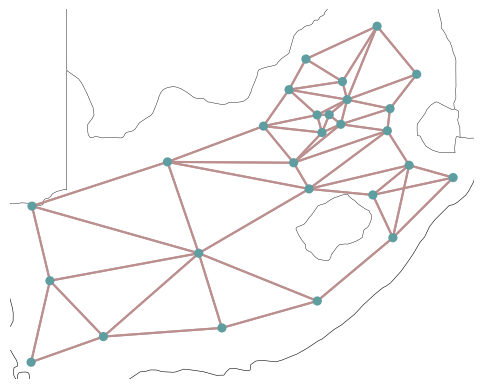

In [50]:
n.plot()

In [38]:
n.snapshots[:10]

MultiIndex([(2030, '2030-01-01 01:00:00'),
            (2030, '2030-01-04 02:00:00'),
            (2030, '2030-01-07 03:00:00'),
            (2030, '2030-01-10 04:00:00'),
            (2030, '2030-01-13 05:00:00'),
            (2030, '2030-01-16 06:00:00'),
            (2030, '2030-01-19 07:00:00'),
            (2030, '2030-01-22 08:00:00'),
            (2030, '2030-01-25 09:00:00'),
            (2030, '2030-01-28 10:00:00')],
           names=['period', 'timestep'])

In [39]:
len(n.snapshots)

120

In [51]:
n.loads_t.p_set

Load                        NAMAQUALAND  WEST COAST    PENINSULA  \
period timestep                                                    
2030   2030-01-01 01:00:00    67.550348  166.159958  2341.704624   
       2030-01-04 02:00:00    73.054538  179.699132  2532.513203   
       2030-01-07 03:00:00    72.112421  177.381720  2499.853741   
       2030-01-10 04:00:00    76.277005  187.625739  2644.223465   
       2030-01-13 05:00:00    73.684864  181.249606  2554.364152   
...                                 ...         ...          ...   
       2030-12-16 20:00:00    73.719966  181.335948  2555.580977   
       2030-12-19 21:00:00    74.118614  182.316541  2569.400548   
       2030-12-22 22:00:00    66.061387  162.497420  2290.088198   
       2030-12-25 23:00:00    65.866941  162.019123  2283.347523   
       2030-12-29 00:00:00    65.750596  161.732937  2279.314289   

Load                        SOUTHERN CAPE  PORT ELIZABETH       KAROO  \
period timestep                                                         
2030   2030-01-01 01:00:00     620.441368      928.474420  239.414658   
       2030-01-04 02:00:00     670.996649     1004.129088  258.922828   
       2030-01-07 03:00:00     662.343431      991.179771  255.583741   
       2030-01-10 04:00:00     700.594604     1048.421660  270.344027   
       2030-01-13 05:00:00     676.786121     1012.792882  261.156857   
...                                   ...             ...         ...   
       2030-12-16 20:00:00     677.108522     1013.275347  261.281265   
       2030-12-19 21:00:00     680.770057     1018.754739  262.694171   
       2030-12-22 22:00:00     606.765448      908.008760  234.137422   
       2030-12-25 23:00:00     604.979486      905.336115  233.448259   
       2030-12-29 00:00:00     603.910869      903.736958  233.035903   

Load                         KIMBERLEY  CARLETONVILLE      WELKOM  \
period timestep                                                     
2030   2030-01-01 01:00:00  657.167420    1010.607625  452.178733   
       2030-01-04 02:00:00  710.715241    1092.954734  489.023509   
       2030-01-07 03:00:00  701.549809    1078.859915  482.717028   
       2030-01-10 04:00:00  742.065200    1141.165444  510.594549   
       2030-01-13 05:00:00  716.847411    1102.384930  493.242885   
...                                ...            ...         ...   
       2030-12-16 20:00:00  717.188897    1102.910075  493.477852   
       2030-12-19 21:00:00  721.067171    1108.874176  496.146385   
       2030-12-22 22:00:00  642.681975     988.331565  442.211699   
       2030-12-25 23:00:00  640.790296     985.422497  440.910087   
       2030-12-29 00:00:00  639.658424     983.681877  440.131277   

Load                        BLOEMFONTEIN  ...    POLOKWANE     WARMBAD  \
period timestep                           ...                            
2030   2030-01-01 01:00:00    802.071550  ...  2150.896922  405.586853   
       2030-01-04 02:00:00    867.426562  ...  2326.157961  438.635193   
       2030-01-07 03:00:00    856.240170  ...  2296.159670  432.978524   
       2030-01-10 04:00:00    905.689126  ...  2428.765803  457.983583   
       2030-01-13 05:00:00    874.910864  ...  2346.228442  442.419811   
...                                  ...  ...          ...         ...   
       2030-12-16 20:00:00    875.327646  ...  2347.346117  442.630567   
       2030-12-19 21:00:00    880.061072  ...  2360.039636  445.024138   
       2030-12-22 22:00:00    784.392093  ...  2103.486326  396.646808   
       2030-12-25 23:00:00    782.083303  ...  2097.294897  395.479313   
       2030-12-29 00:00:00    780.701856  ...  2093.590301  394.780751   

Load                           PRETORIA  JOHANNESBURG        NIGEL  \
period timestep                                                      
2030   2030-01-01 01:00:00  1485.405423   2716.095208  1008.829613   
       2030-01-04 02:00:00  1606.440371   2937.410169  1091.031844   
       2030-01-07 03:00:

In [41]:
load_values = n.loads_t.p_set
print(load_values)

Load                        NAMAQUALAND  WEST COAST    PENINSULA  \
period timestep                                                    
2030   2030-01-01 01:00:00    67.550348  166.159958  2341.704624   
       2030-01-04 02:00:00    73.054538  179.699132  2532.513203   
       2030-01-07 03:00:00    72.112421  177.381720  2499.853741   
       2030-01-10 04:00:00    76.277005  187.625739  2644.223465   
       2030-01-13 05:00:00    73.684864  181.249606  2554.364152   
...                                 ...         ...          ...   
       2030-12-16 20:00:00    73.719966  181.335948  2555.580977   
       2030-12-19 21:00:00    74.118614  182.316541  2569.400548   
       2030-12-22 22:00:00    66.061387  162.497420  2290.088198   
       2030-12-25 23:00:00    65.866941  162.019123  2283.347523   
       2030-12-29 00:00:00    65.750596  161.732937  2279.314289   

Load                        SOUTHERN CAPE  PORT ELIZABETH       KAROO  \
period timestep                           

<Axes: xlabel='period,timestep'>

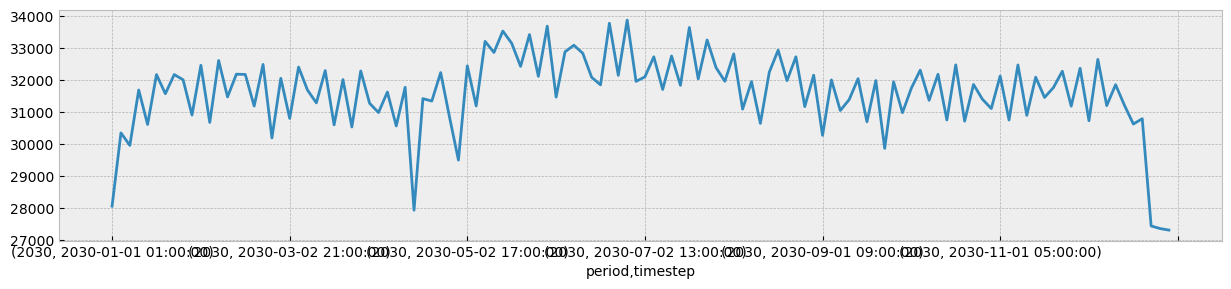

In [7]:
n.loads_t.p_set.sum(axis=1).plot(figsize=(15,3))

In [8]:
load = n.loads_t.p_set.sum(axis=0).groupby(n.loads.bus).sum()

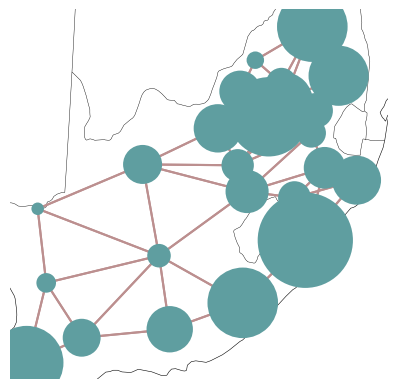

In [9]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())

n.plot(
    ax=ax,
    bus_sizes=load/2e5,
);

In [29]:
# Filter the generators by carrier (e.g. 'solar')
solar_generators = n.generators[n.generators.carrier == 'solar']

# Get the power output time series of the solar generators
solar_output = n.generators_t.p[solar_generators.index]

# Compute the total solar power output for each timestep
solar_total_output = solar_output.sum(axis=1)

# Plot the solar power output time series
fig, ax = plt.subplots()
solar_total_output.plot(ax=ax)
ax.set_xlabel('Time')
ax.set_ylabel('Solar Power Output (MW)')
plt.show()

KeyError: "None of [Index(['BLOEMFONTEIN aga_solar', 'CARLETONVILLE aga_solar', 'KAROO aga_solar',\n       'KIMBERLEY aga_solar', 'NAMAQUALAND aga_solar', 'PENINSULA aga_solar',\n       'POLOKWANE aga_solar', 'PORT ELIZABETH aga_solar',\n       'RUSTENBURG aga_solar', 'SOUTHERN CAPE aga_solar',\n       ...\n       'POLOKWANE solar_2030', 'WARMBAD solar_2030', 'PRETORIA solar_2030',\n       'JOHANNESBURG solar_2030', 'NIGEL solar_2030',\n       'HIGHVELD SOUTH solar_2030', 'HIGHVELD NORTH solar_2030',\n       'LOWVELD solar_2030', 'NEWCASTLE solar_2030', 'EMPANGENI solar_2030'],\n      dtype='object', name='Generator', length=174)] are in the [columns]"

In [13]:
n.generators.groupby("carrier").p_nom.sum() / 1e3 #GW

carrier
CCGT                 0.00000
CSP                  0.60000
OCGT                 0.00000
biomass              0.19306
coal                41.94200
gas                  3.84400
hydro                0.68302
hydro-import         1.76400
load_shedding    27000.00000
nuclear              1.85400
onwind               5.19059
solar                4.04707
Name: p_nom, dtype: float64

In [14]:
n.generators.groupby("carrier").p_nom_opt.sum() / 1e3 #GW

carrier
CCGT                 0.000000
CSP                  0.600000
OCGT                14.063931
biomass              0.193060
coal                41.942000
gas                  3.844000
hydro                0.683020
hydro-import         1.764000
load_shedding    27000.000000
nuclear              1.854000
onwind               5.190590
solar               66.185951
Name: p_nom_opt, dtype: float64

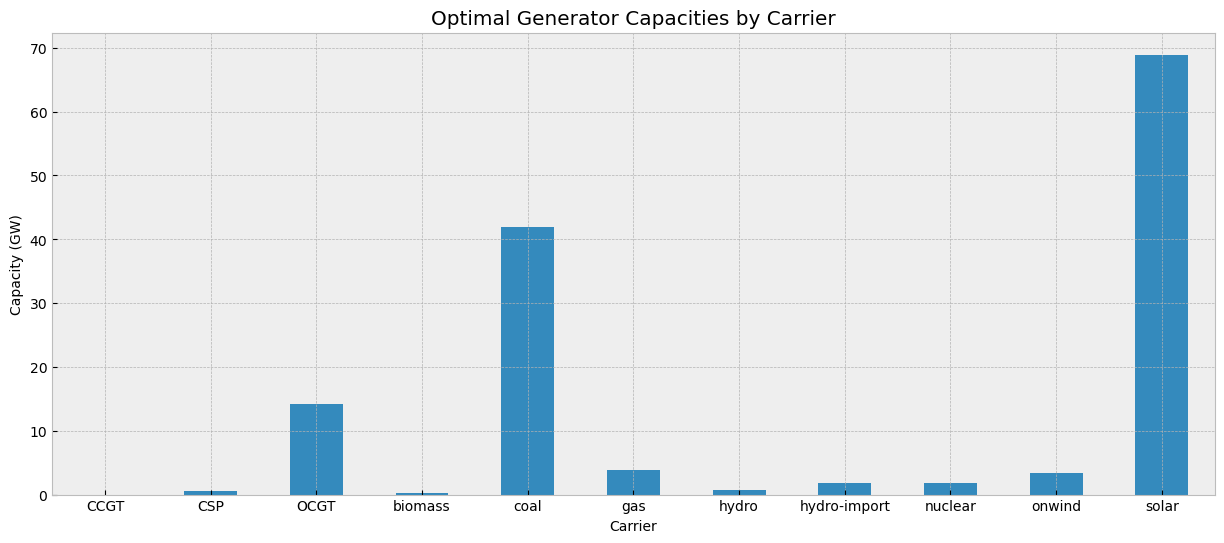

In [57]:
capacities = n.generators.groupby("carrier").p_nom_opt.sum() / 1e3 #GW
capacities = capacities.drop("load_shedding")

ax = capacities.plot.bar(figsize=(15,6), rot=0)
ax.set_xlabel("Carrier")
ax.set_ylabel("Capacity (GW)")
ax.set_title("Optimal Generator Capacities by Carrier")
plt.show()

In [32]:
capacities = n.generators.groupby("carrier").p_nom_opt.sum() / 1e3 #GW

renewables = capacities.loc[["CSP", "biomass", "hydro", "hydro-import", "onwind", "solar"]].sum()
nuclear = capacities.loc[["nuclear"]].sum()
fossil_fuels = capacities.sum() - renewables - nuclear

print("Renewable capacities (GW):", renewables)
print("Fossil fuel capacities (GW):", fossil_fuels)
print("Nuclear fuel capacities (GW):", nuclear)

Renewable capacities (GW): 0.0
Fossil fuel capacities (GW): 0.0
Nuclear fuel capacities (GW): 0.0


In [18]:
s = n.generators.groupby(['bus', 'carrier'])['p_nom_opt'].sum()
s = s[s != 0]  # filter carriers with sum of p_nom equal to 0
s = s[s.index.get_level_values('carrier') != 'load_shedding']

In [19]:
s.head(70)

bus             carrier     
BLOEMFONTEIN    hydro               8.020000
                solar             339.000000
CARLETONVILLE   solar           23950.666805
EAST LONDON     gas               171.000000
                hydro              65.000000
                onwind            184.750000
EMPANGENI       biomass            16.500000
                solar              75.000000
HIGHVELD NORTH  coal            12791.000000
HIGHVELD SOUTH  coal             8670.000000
JOHANNESBURG    biomass             7.560000
KAROO           hydro             600.000000
                onwind            644.700000
                solar             836.170000
KIMBERLEY       CSP               400.000000
                onwind             84.000000
                solar            9701.548955
LOWVELD         biomass           169.000000
NAMAQUALAND     CSP               200.000000
                hydro              10.000000
                onwind            276.700000
                solar     

/home/agatha/anaconda3/envs/pypsa-za/lib/python3.11/site-packages/pypsa/plot.py:259: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, ratio in ratios.iteritems():


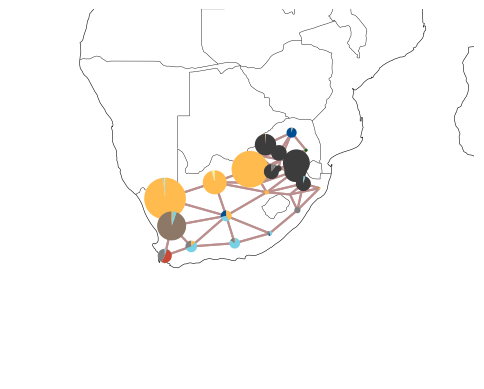

In [29]:
n.plot(margin=1, bus_sizes = s/10000, bus_colors=colors);

In [30]:
map_boundaries = [14, 34, -35, -22] 

/home/agatha/anaconda3/envs/pypsa-za/lib/python3.11/site-packages/pypsa/plot.py:259: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, ratio in ratios.iteritems():


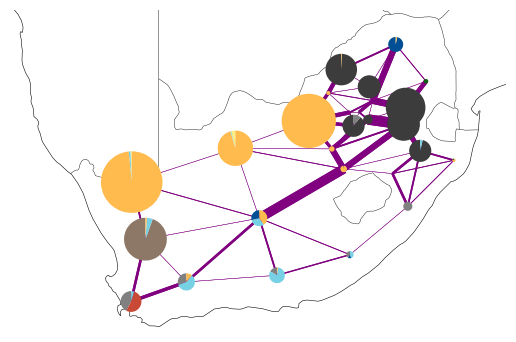

In [31]:
fig = plt.figure()
#ax = plt.axes(projection=ccrs.EqualEarth())

n.plot(
    #ax=ax,
    bus_sizes=s / 20000,
    bus_colors=colors,
    line_colors='purple',
    line_widths=n.lines.s_nom_min/3e3,
    line_cmap=plt.cm.viridis,
    boundaries=map_boundaries
    #color_geomap=True
);

In [32]:
supply_regions = gpd.read_file('/home/agatha/Desktop/pypsa-za-master/data/bundle/supply_regions/27-supply.shp')
resarea = gpd.read_file('/home/agatha/Desktop/pypsa-za-master/data/bundle/REDZ_DEA_Unpublished_Draft_2015/REDZ_DEA_Unpublished_Draft_2015.shp')

/home/agatha/anaconda3/envs/pypsa-za/lib/python3.11/site-packages/pypsa/plot.py:259: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, ratio in ratios.iteritems():


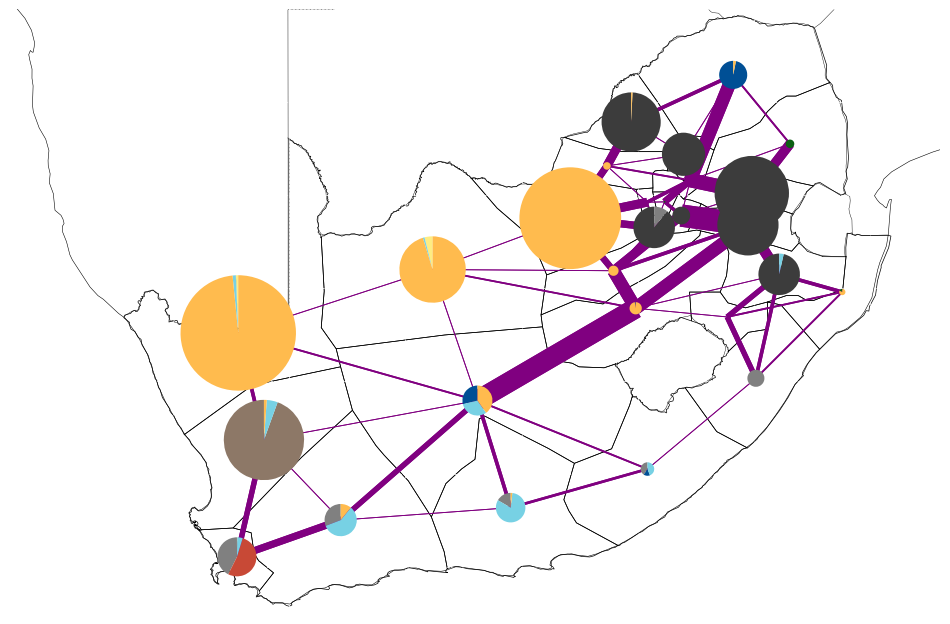

In [33]:
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(12,12))
fig.set_facecolor('none')

ax.gridlines(color='white', linewidth=0.5, linestyle='--')

supply_regions.plot(ax=ax, facecolor='none', edgecolor='black')
#resarea.plot(ax=ax, facecolor='gray', alpha=0.2)

n.plot(
    ax=ax,
    bus_sizes=s / 20000,
    bus_colors=colors,
    line_colors='purple',
    line_widths=n.lines.s_nom_min/1.4e3,
    line_cmap=plt.cm.viridis,
    boundaries=map_boundaries
);

# Save plot as PNG with descriptive file name
plt.savefig('karte.png', dpi=600,facecolor='white', bbox_inches='tight')

plt.show()


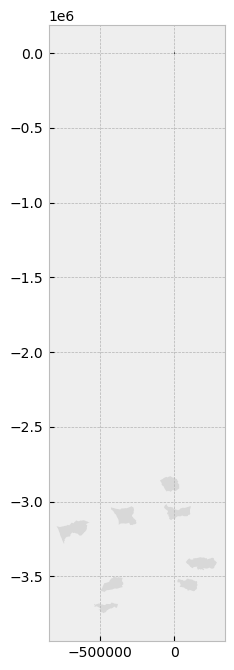

In [273]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx


# Create the plot
fig, ax = plt.subplots(figsize=(8,8))

# Plot the shapes
supply_regions.plot(ax=ax, color='black', edgecolor='black')
resarea.plot(ax=ax, color='gray', alpha=0.2)

# Add the basemap using contextily
#ctx.add_basemap(ax=ax)

# Show the plot
plt.show()

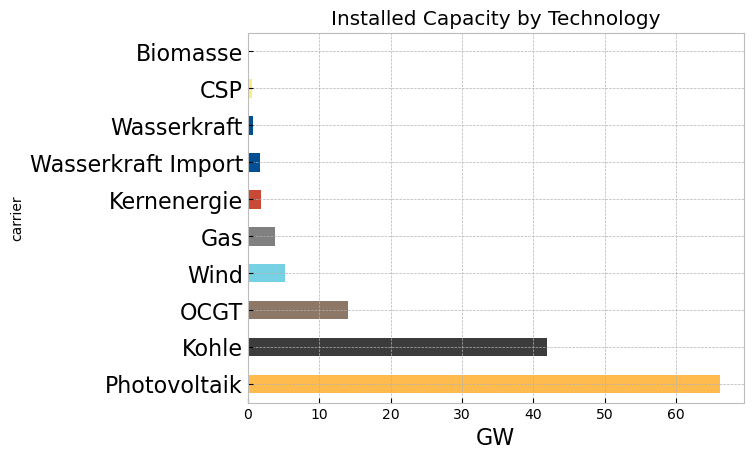

In [55]:
# Group by carrier and sum p_nom, divide by 1000 to convert to GW
a = n.generators.groupby('carrier')['p_nom_opt'].sum().div(1e3)
a = a[a != 0] 

carrier_order = ['onwind', 'solar', 'CSP', 'hydro', 'hydro-import', 'biomass', 'gas', 'OCGT','nuclear', 'coal']
a_sorted = a.loc[carrier_order].sort_values(ascending=False)

# Create horizontal bar chart
ax = a_sorted.plot.barh(color=[colors.get(carrier, '#333333') for carrier in a_sorted.index])
ax.set_xlabel('GW', fontsize=16)
ax.set_title('Installed Capacity by Technology')

# Set plot background color to white
ax.set_facecolor('white')

# Replace carrier names with nicer names on the y-axis
ax.set_yticklabels([name_replacements.get(label.get_text(), label.get_text()) for label in ax.get_yticklabels()],fontsize=16)

# Save plot as PNG with descriptive file name
plt.savefig('balken.png', dpi=600,facecolor='white', bbox_inches='tight')

plt.show()

In [57]:
a = a[a.index.get_level_values('carrier') != 'load_shedding']

In [58]:
a

carrier
CSP              0.600000
OCGT            14.063931
biomass          0.193060
coal            41.942000
gas              3.844000
hydro            0.683020
hydro-import     1.764000
nuclear          1.854000
onwind           5.190590
solar           66.185951
Name: p_nom_opt, dtype: float64

In [ ]:
# Summe der installierten Kapazität - 53MW Literaturwert 2021

In [59]:
a.sum()

136.32055225980145

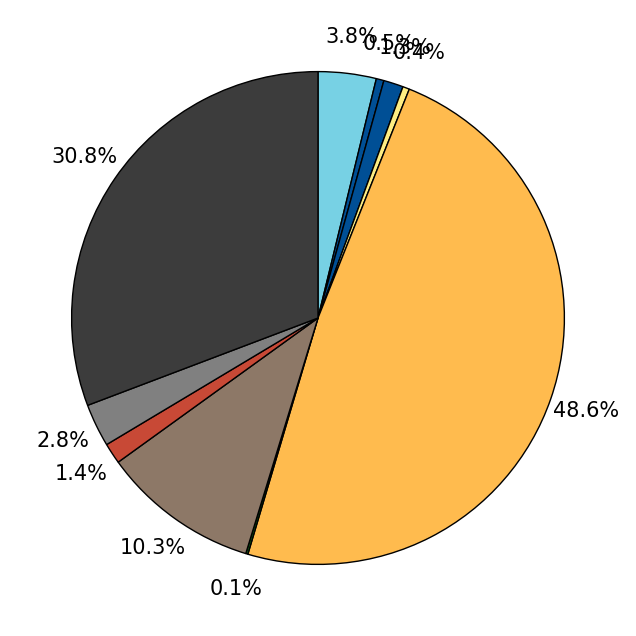

In [64]:


carriers = a.loc[colors.keys()]



wedgeprops = {'edgecolor': 'black', 'linewidth': 1}

plt.figure(figsize=(8,8))  # specify the figure size

plt.pie(carriers, labels=None, colors=colors.values(), autopct='%1.1f%%', 
        startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=1.15,
       textprops={'fontsize': 15})

#plt.title('Stromerzeugung nach Technologie', fontsize=18)

# Save plot as PNG with descriptive file name
plt.savefig('Kreis.png', dpi=600,facecolor='white', bbox_inches='tight')

plt.show()


/tmp/ipykernel_18850/1341749826.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.legend(handles=[plt.Rectangle((0,0),2,1, color=color, edgecolor='black', linewidth=1) for color in colors.values()],


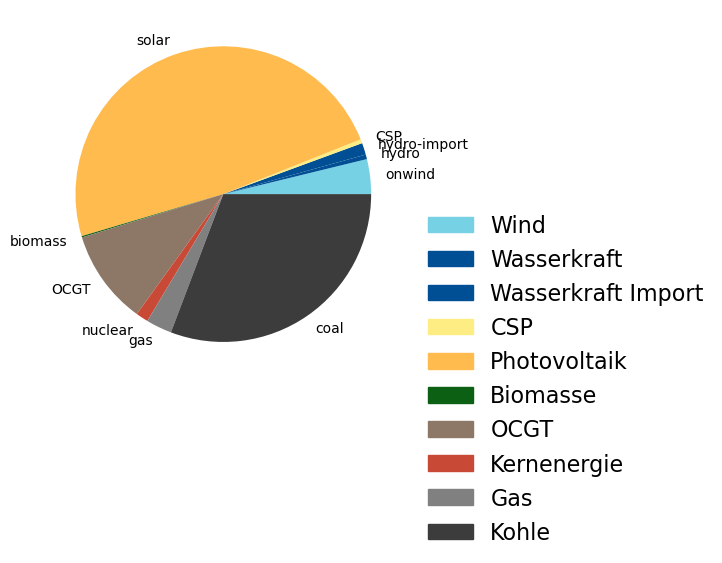

In [65]:
# Select carriers in the same order as in `a`
carriers = a.loc[colors.keys()]

# Calculate total capacity
total_capacity = carriers.sum()

# Create a pie chart of the sum of p_nom grouped by carrier
plt.pie(carriers, labels=carriers.index, colors=colors.values(), radius=1)

legend_table = []
for carrier, value in carriers.items():
    legend_table.append([colors[carrier], f"{name_replacements.get(carrier, carrier)}"])

plt.legend(handles=[plt.Rectangle((0,0),2,1, color=color, edgecolor='black', linewidth=1) for color in colors.values()],
           labels=[text for _, text in legend_table],
           loc='best', bbox_to_anchor=(1, 0.5), prop={'size': 16}, frameon=False)

#plt.title('Total Capacity by Carrier')
plt.savefig('legende.png', transparent=True, bbox_inches='tight', dpi=800)
plt.show()

In [38]:
name_replacements = {
'onwind': 'Wind',
'hydro': 'Wasserkraft',
'hydro-import': 'Wasserkraft Import',
'solar': 'Photovoltaik',
'CSP': 'CSP',
'biomass': 'Biomasse',
'gas': 'Gas',
'nuclear': 'Kernenergie',
'coal': 'Kohle',
# add more replacements as needed
}

In [61]:

colors = {
    "onwind": "#77D1E4",
    "hydro": "#004F95",
    "hydro-import": "#004F95",
    "CSP": "#FEED82",
    "solar": "#FFBB4E",
    "biomass": "#0c6013",
    #"CCGT": "#CCC8C8",
    "OCGT": "#8D7867",
    #"load_shedding":"black",
    "nuclear": "#C84936",
    "gas": "grey",
    "coal": "#3C3C3C",

}




In [ ]:
#Emissions

In [ ]:
# emissions
#gas 500 kg /MW
#coal 1000 kg /MW

In [34]:
emissions = n.generators.p_nom / n.generators.efficiency * n.generators.carrier.map(n.carriers.co2_emissions)
emissions.sum().sum()

42601.50084816667

In [66]:
a

carrier
CSP              0.600000
OCGT            14.063931
biomass          0.193060
coal            41.942000
gas              3.844000
hydro            0.683020
hydro-import     1.764000
nuclear          1.854000
onwind           5.190590
solar           66.185951
Name: p_nom_opt, dtype: float64

In [67]:
a.sum()

136.32055225980145

In [68]:
emissions = (41.942*1 + (3.844+14.06)*0.5) /136.32
print(emissions)

0.37334213615023476


In [ ]:
# 775 grams CO2/ kw
# 2019 SA 912 gramms per kW - meine Annahme RE 0 grams und ohne Netz und Speicher
# global average 475 grams CO2 per kW